# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

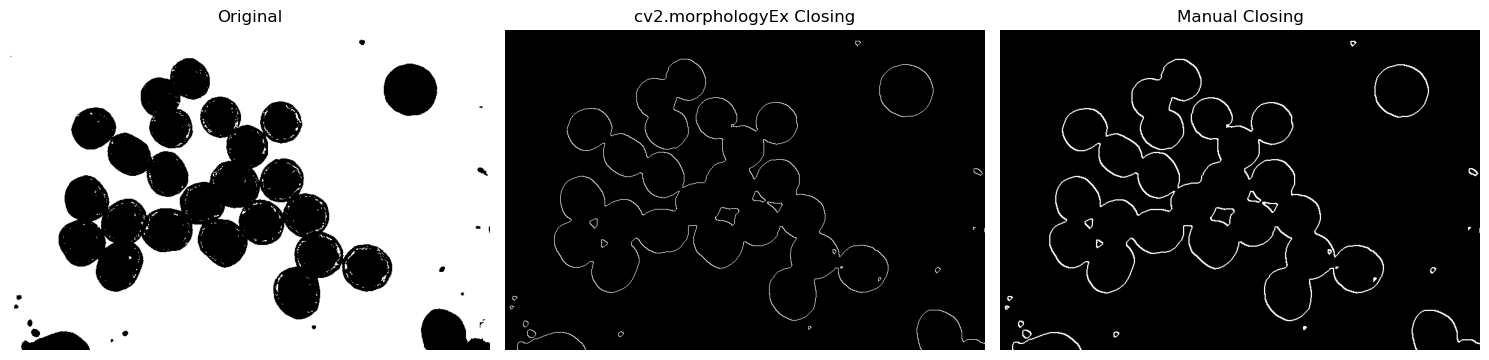

In [ ]:
# Read the image
img = cv2.imread('bacteria.jpg', cv2.IMREAD_GRAYSCALE)
# Ensure the image was successfully loaded 
assert img is not None, "Image not found" #stop execution with an error message if img is None

# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_img = cv2.medianBlur(binary, 7) # Apply a median blur with kernel size 7 to reduce noise in the binary image

# TODO: Morphological edge detection (dilate and then erode and then ...)
kernel_size=(2, 2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
dilated = cv2.dilate(binary_img, kernel, iterations=1)

eroded = cv2.erode(binary_img, kernel, iterations=1)

result_img = cv2.subtract(dilated, eroded)

# TODO: clean edges with morphological closing
# Apply morphological closing to fill small holes and gaps in the result image
closed = cv2.morphologyEx(result_img, cv2.MORPH_CLOSE, kernel)

# Manually close small gaps by eroding the dilated image 
dilated_img = cv2.dilate(result_img, kernel, iterations=2)
mannual_closed = cv2.erode(dilated_img, kernel, iterations=1)

# TODO: Show results
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(closed, cmap='gray')
plt.title('cv2.morphologyEx Closing')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mannual_closed, cmap='gray')
plt.title('Manual Closing')
plt.axis('off')

plt.tight_layout()
plt.show()